In [25]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import utils

In [2]:
batch1= '2024_01_23_Batch_7'
batch2 = '2024_02_06_Batch_8'
pipeline = 'profiles_tcdropped_filtered_var_mad_outlier_featselect'

In [3]:
result_dir1 = f"../6.downstream_analysis_snakmake/outputs/results/{batch1}/{pipeline}"
result_dir2 = f"../6.downstream_analysis_snakmake/outputs/results/{batch2}/{pipeline}"

In [4]:
df_result_batch1 = pd.read_csv(f'{result_dir1}/result.csv')
df_result_batch2 = pd.read_csv(f'{result_dir2}/result.csv')

df_threshold = pd.read_csv("outputs/data/thresholds.csv")

In [9]:
score_col = 'PR_AUC'
df_protein_ctrl_1, df_protein_var_1, df_non_protein_ctrl_1, df_non_protein_var_1 = utils.split_result_dataframes(
    df_result_batch1, score_col=score_col)
df_protein_ctrl_1, df_protein_var_1, df_non_protein_ctrl_1, df_non_protein_var_1 = utils.take_median(
    df_protein_ctrl_1, df_protein_var_1, df_non_protein_ctrl_1, df_non_protein_var_1
)
df_protein_ctrl_2, df_protein_var_2, df_non_protein_ctrl_2, df_non_protein_var_2 = utils.split_result_dataframes(
    df_result_batch2, score_col=score_col)
df_protein_ctrl_2, df_protein_var_2, df_non_protein_ctrl_2, df_non_protein_var_2 = utils.take_median(
    df_protein_ctrl_2, df_protein_var_2, df_non_protein_ctrl_2, df_non_protein_var_2
)

Dropped 10 NaN rows for PR_AUC column.
Dropped 0 NaN rows for PR_AUC column.


In [28]:
protein_thresh_1, protein_thresh_2, non_protein_thresh_1, non_protein_thresh_2 = utils.split_threshold_dataframe(
    df_threshold, batch1, batch2
)

In [29]:
protein_joined = df_protein_var_1.merge(
    df_protein_var_2, 
    on = ['Group1', 'Group2', 'Metadata_Control'], 
    suffixes=['_b7', '_b8'],
    how='inner'
)

non_protein_joined = df_non_protein_var_1.merge(
    df_non_protein_var_2, 
    on = ['Group1', 'Group2', 'Metadata_Control'], 
    suffixes=['_b7', '_b8'],
    how='inner'
)

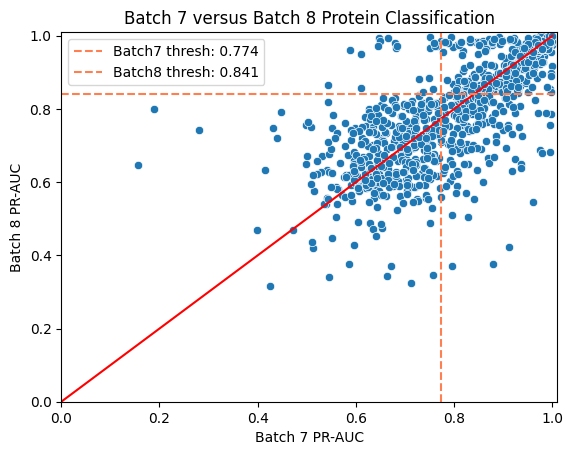

In [45]:
sb.scatterplot(data=protein_joined,
           x='PR_AUC_b7',
           y='PR_AUC_b8'
           )
plt.xlabel('Batch 7 PR-AUC')
plt.ylabel('Batch 8 PR-AUC')
plt.xlim(0, 1.01), 
plt.ylim(0, 1.01)
plt.plot((0, 1), (0, 1), 'k-', color = 'r')

plt.title("Batch 7 versus Batch 8 Protein Classification")

plt.axvline(batch7_thresh, color='coral', linestyle='--', label=f'Batch7 thresh: {"{:.3f}".format(protein_thresh_1)}')
plt.axhline(batch8_thresh, color='coral', linestyle='--', label=f'Batch8 thresh: {"{:.3f}".format(protein_thresh_2)}')
plt.legend(loc=0)
plt.savefig(f'outputs/figures/technical_replicate_comparison_protein.png', bbox_inches='tight')
plt.show()

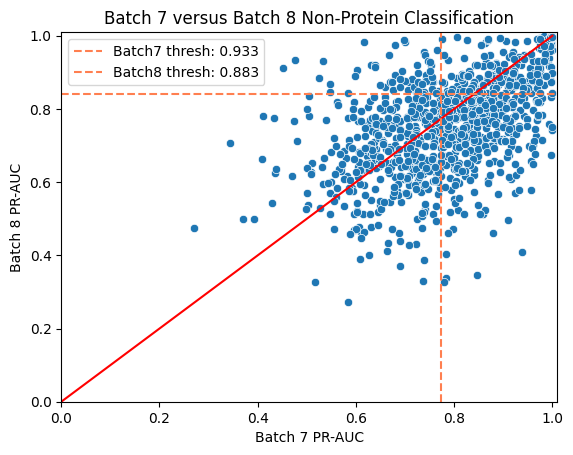

In [46]:
sb.scatterplot(data=non_protein_joined,
           x='PR_AUC_b7',
           y='PR_AUC_b8'
           )
plt.xlabel('Batch 7 PR-AUC')
plt.ylabel('Batch 8 PR-AUC')
plt.xlim(0, 1.01), 
plt.ylim(0, 1.01)
plt.plot((0, 1), (0, 1), 'k-', color = 'r')

plt.title("Batch 7 versus Batch 8 Non-Protein Classification")

plt.axvline(batch7_thresh, color='coral', linestyle='--', label=f'Batch7 thresh: {"{:.3f}".format(non_protein_thresh_1)}')
plt.axhline(batch8_thresh, color='coral', linestyle='--', label=f'Batch8 thresh: {"{:.3f}".format(non_protein_thresh_2)}')
plt.legend(loc=0)
plt.savefig(f'outputs/figures/technical_replicate_comparison_non_protein.png', bbox_inches='tight')

plt.show()

In [19]:
protein_passed_1, non_protein_passed_1 = utils.get_positive_alleles(
    df_protein_var_1, df_non_protein_var_1, df_threshold, batch1, score_col
)
protein_passed_2, non_protein_passed_2 = utils.get_positive_alleles(
    df_protein_var_2, df_non_protein_var_2, df_threshold, batch2, score_col
)

In [37]:
protein_passed_list_1 = list(protein_passed_1['Group2'])
protein_passed_list_2 = list(protein_passed_2['Group2'])
non_protein_passed_list_1 = list(non_protein_passed_1['Group2'])
non_protein_passed_list_2 = list(non_protein_passed_2['Group2'])

In [39]:
pro_com, pro_uniq1, pro_uniq2 = utils.create_venn(protein_passed_list_1, protein_passed_list_2)
nonpro_com, nonpro_uniq1, nonpro_uniq2 = utils.create_venn(non_protein_passed_list_1, non_protein_passed_list_2)

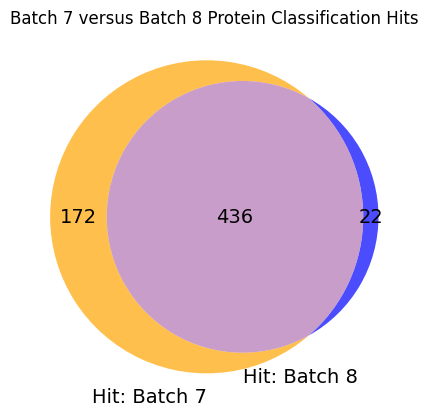

In [43]:
# depict venn diagram 
out = venn2(subsets = (pro_uniq1, pro_uniq2, pro_com), 
                 set_labels = ('Hit: Batch 7',  
                               'Hit: Batch 8'), 
                 set_colors=("orange", 
                             "blue"),alpha=0.7) 
for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
plt.title("Batch 7 versus Batch 8 Protein Classification Hits")
plt.savefig(f'outputs/figures/technical_replicate_comparison_protein_venn.png', bbox_inches='tight')

plt.show()

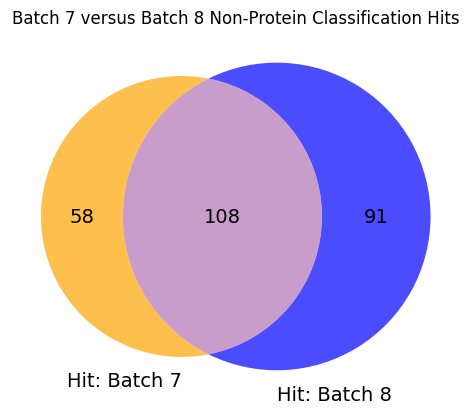

In [44]:
# depict venn diagram 
out = venn2(subsets = (nonpro_uniq1, nonpro_uniq2, nonpro_com), 
                 set_labels = ('Hit: Batch 7',  
                               'Hit: Batch 8'), 
                 set_colors=("orange", 
                             "blue"),alpha=0.7) 
for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
plt.title("Batch 7 versus Batch 8 Non-Protein Classification Hits")
plt.savefig(f'outputs/figures/technical_replicate_comparison_non_protein_venn.png', bbox_inches='tight')

plt.show()